In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

In [54]:
file_path = "/content/drive/MyDrive/DS-Lab-CS21B2018/Titanic.csv"
titanic_df = pd.read_csv(file_path)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
print("Total size:", len(titanic_df))

Total size: 891


# Data Analysis

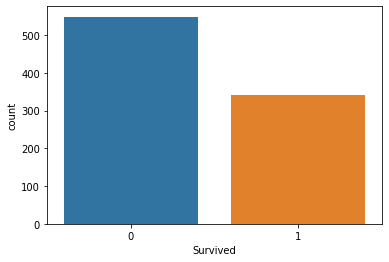

In [9]:
sns.countplot(x='Survived', data=titanic_df)

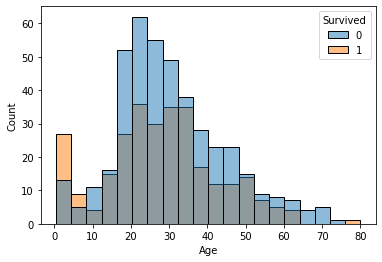

In [16]:
sns.histplot(x='Age', hue='Survived', data=titanic_df)

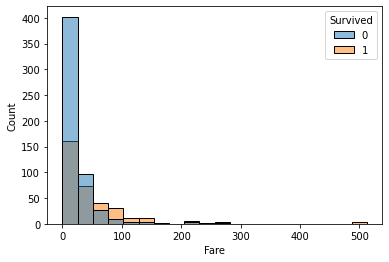

In [19]:
sns.histplot(x='Fare', hue='Survived', data=titanic_df, bins=20)

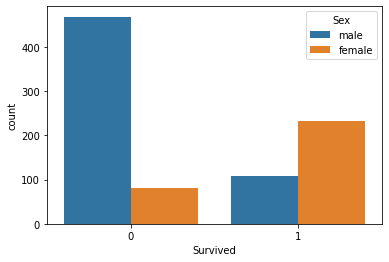

In [21]:
sns.countplot(x='Survived', hue="Sex", data=titanic_df)

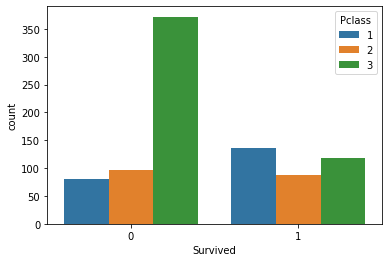

In [23]:
sns.countplot(x='Survived',hue="Pclass", data=titanic_df)

In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Wrangling

In [25]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
titanic_df.drop("Cabin",axis=1, inplace=True)
titanic_df.dropna(inplace=True)

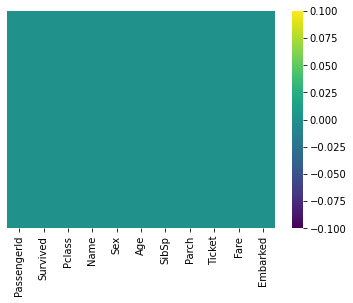

In [57]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap="viridis")

In [58]:
sex=pd.get_dummies(titanic_df["Sex"],drop_first=True)
embark=pd.get_dummies(titanic_df["Embarked"],drop_first=True)
pcl=pd.get_dummies(titanic_df["Pclass"], columns=["cls_1", "cls_2", "cls_3"], drop_first=True)

In [59]:
titanic_df=pd.concat([titanic_df,sex,embark,pcl],axis=1)
titanic_df.drop(["Sex",'Embarked', "Pclass", "PassengerId",'Name',"Ticket"],axis=1,inplace=True)

In [67]:
titanic_df

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [64]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Age       712 non-null    float64
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   male      712 non-null    uint8  
 6   Q         712 non-null    uint8  
 7   S         712 non-null    uint8  
 8   2         712 non-null    uint8  
 9   3         712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 36.9 KB


# Train and Test Data

In [61]:
x=titanic_df.drop("Survived",axis=1)
y=titanic_df["Survived"]

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
display(x_train)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
11,58.0,0,0,26.5500,0,0,1,0,0
280,65.0,0,0,7.7500,1,1,0,0,1
74,32.0,0,0,56.4958,1,0,1,0,1
258,35.0,0,0,512.3292,0,0,0,0,0
438,64.0,1,4,263.0000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
800,34.0,0,0,13.0000,1,0,1,1,0
723,50.0,0,0,13.0000,1,0,1,1,0
10,4.0,1,1,16.7000,0,0,1,0,1
795,39.0,0,0,13.0000,1,0,1,1,0


In [90]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [91]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
predictions = model.predict(x_test)
print("Prediction result:", predictions)

Prediction result: [0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1]


# Performance Analysis

In [93]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8181818181818182


In [94]:
scores = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7552447552447552, 0.8041958041958042, 0.8181818181818182, 0.8461538461538461, 0.8391608391608392, 0.8391608391608392, 0.8531468531468531, 0.8321678321678322, 0.8391608391608392, 0.8251748251748252, 0.8321678321678322, 0.8181818181818182, 0.8181818181818182, 0.8041958041958042, 0.8041958041958042, 0.8041958041958042, 0.8041958041958042, 0.7972027972027972, 0.7902097902097902, 0.7972027972027972, 0.7972027972027972, 0.8041958041958042, 0.8041958041958042, 0.8041958041958042]


Text(0, 0.5, 'Testing Accuracy')

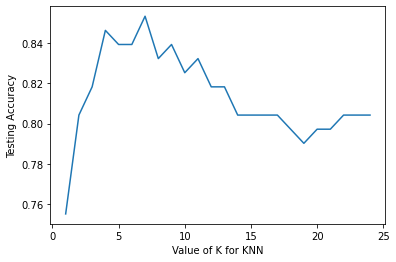

In [95]:
plt.plot(range(1, 25), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [96]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_train, y_train)
    new_predictions = new_model.predict(x_test)
    error_rates.append(np.mean(new_predictions != y_test))

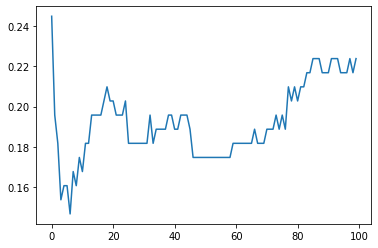

In [97]:
plt.plot(error_rates)